In [ ]:
# Part 2， Comments on the main function blocks.
# Requirements:(这个是咱们part2的要求，仅供参考)
# Logic of the function; Main inputs, Main outputs, Conclusion of the visualization(briefly).

In [ ]:
# Install libraries into computers that we gonna use in this project to reach our objective.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Read the files of the dataset we gonna use. 
# We got 9 datasets from the data website. 

In [37]:
# read the files
sanitation = pd.read_csv("at_least_basic_sanitation_overall_access_percent.csv")
drought = pd.read_csv("drought_affected_annual_number.csv")
gini = pd.read_csv("gini.csv")
spending = pd.read_csv("government_health_spending_per_person_international_dollar.csv")
hdi = pd.read_csv("hdi_human_development_index.csv")
income = pd.read_csv("income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
life = pd.read_csv("life_expectancy_years.csv")
population = pd.read_csv("population_total.csv")
aged65 = pd.read_csv("population_aged_65plus_years_both_sexes_percent.csv")
featureList = [sanitation,drought,gini,spending,hdi,income,life,population,aged65]
# Result: featureList is the combination list of the whole datasets.

In [38]:
#Find the common columns （common countries and common years） in above dataset.

In [39]:
# Using "&" to get the common year of 8 datasets.
commonColumns = sanitation.columns & drought.columns & gini.columns & spending.columns & hdi.columns & income.columns & life.columns & population.columns & aged60.columns & aged65.columns
print(commonColumns)
# Result: shows that the common columns includes year 2000 to 2008 and country.


Index(['country', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008'],
      dtype='object')


In [40]:
# The "set" function doesn't store duplicate objects which can help us to get all countries mentioned in "sannitation" whithout duplication. 
# The "intersection" function can get the intersection of multiple sets.
# Using "set" function to get the number of countries without duplication.
# Using "intersection" function to get the common contries of the "featureList"'s country column based on sanitation set.
# USing "len" function to get the number of the common countires.
countryList = set (sanitation["country"])
for feature in featureList:
    countryList = countryList.intersection(feature["country"])
print(len(countryList))
# Result: Get the number of countries from all 9 data set, which is 122.

122


In [41]:
# Select the data of common countries only

In [42]:
# The "isin" function helps in selecting rows with a particular(or Multiple) value in a particular column.
# Using "isin" funciton to select row of 'country' column in 'countryList'. (不知道这么表述对不对？)
def getCommonCountry(data):
    return data[data["country"].isin(countryList)][commonColumns]
sanitation = getCommonCountry(sanitation)
drought = getCommonCountry(drought)
gini = getCommonCountry(gini)
spending = getCommonCountry(spending)
hdi = getCommonCountry(hdi)
income = getCommonCountry(income)
life = getCommonCountry(life)
population = getCommonCountry(population)
# Result: the dataset has been redefined.

In [43]:
# Reconstruct the data according to the country and year

In [47]:
# Using 'concat' function in panda library to concatenate objects with optional set logic along the other axes.
    # 'axis = 1' means the concatenate along with horizontal way.
    # 'axis = 0' or default means the concatenate along with vertical way.
    # Thus, we concatenate different dataset with same year in horizontal way and data with different years in vertical way.
# 'set_index' helps to make changes in the original dataframe itself.
# 'reset_index' helps to reset the index of the DataFrame, and use the default one instead.(google的解释，我没有看明白这两个的差距)
    # inplace = True, means that creating a new index. 
# 'dropna' funciton helps to drop the missing data in 'data' and keep the availbale ones.
data = None
for year in commonColumns[1:]:
    lifeData = life[["country",year]].rename(columns={year:"life"}).set_index("country")
    incomeData = income[["country",year]].rename(columns={year:"income"}).set_index("country")
    hdiData = hdi[["country",year]].rename(columns={year:"hdi"}).set_index("country")
    spendingData = spending[["country",year]].rename(columns={year:"spending"}).set_index("country")
    sanitationData = sanitation[["country",year]].rename(columns={year:"sanitation"}).set_index("country")
    droughtData = drought[["country",year]].rename(columns={year:"drought"}).set_index("country")
    giniData = gini[["country",year]].rename(columns={year:"gini"}).set_index("country")
    populationData = population[["country",year]].rename(columns={year:"population"}).set_index("country")
    aged65Data = aged65[["country",year]].rename(columns={year:"ageAbove65"}).set_index("country")
    yeardata = pd.concat([lifeData,incomeData,hdiData,spendingData,sanitationData,droughtData,giniData,
                          aged65Data,populationData],axis=1)
    yeardata["year"] = year
    if data is None:
        data = yeardata
    else:
        data = pd.concat([data,yeardata])
data.reset_index(inplace=True)
data.rename(columns={"index":"country"},inplace=True)
data.dropna(inplace=True)
data
# Result: shows the table of the restructural data set. Year is cumulated from 2000 to 2008.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,country,life,income,hdi,spending,sanitation,drought,gini,ageAbove65,population,year
1,Albania,74.9,5440.0,0.662,96.2,88.3,0.0,30.2,7.06,3130000.0,2000
2,Algeria,74.0,10300.0,0.644,138.0,83.7,0.0,33.1,4.31,31000000.0,2000
3,Angola,51.7,3890.0,0.391,44.6,27.6,0.0,51.8,2.57,16400000.0,2000
5,Argentina,74.2,15000.0,0.771,452.0,87.0,0.0,51.7,9.73,36900000.0,2000
6,Armenia,72.3,2930.0,0.644,23.1,86.9,297000.0,36.2,10.00,3070000.0,2000
...,...,...,...,...,...,...,...,...,...,...,...
1647,United States,78.2,50400.0,0.907,3550.0,100.0,0.0,40.8,12.60,303000000.0,2008
1648,Uruguay,76.1,15400.0,0.774,623.0,94.8,0.0,45.5,13.80,3340000.0,2008
1649,Uzbekistan,68.0,3790.0,0.651,68.7,97.4,0.0,33.5,4.70,27600000.0,2008
1652,Vietnam,73.0,4030.0,0.641,63.1,67.3,0.0,36.7,6.52,86200000.0,2008


In [70]:
# calculate the percentage of people affected by drought
data["drought percent"] = data["drought"] / data["population"]
data.drop(["drought","population"],axis=1,inplace=True)

In [71]:
# show the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 1 to 1654
Data columns (total 11 columns):
country            1038 non-null object
life               1038 non-null float64
income             1038 non-null float64
hdi                1038 non-null float64
spending           1038 non-null float64
sanitation         1038 non-null float64
gini               1038 non-null float64
ageAbove60         1038 non-null float64
ageAbove65         1038 non-null float64
year               1038 non-null object
drought percent    1038 non-null float64
dtypes: float64(9), object(2)
memory usage: 97.3+ KB


In [72]:
data.head(10)

,country,life,income,hdi,spending,sanitation,gini,ageAbove60,ageAbove65,year,drought percent
1,Albania,74.9,5440.0,0.662,96.20,88.3,30.2,10.50,7.06,2000,0.000000
2,Algeria,74.0,10300.0,0.644,138.00,83.7,33.1,6.37,4.31,2000,0.000000
3,Angola,51.7,3890.0,0.391,44.60,27.6,51.8,4.20,2.57,2000,0.000000
5,Argentina,74.2,15000.0,0.771,452.00,87.0,51.7,13.30,9.73,2000,0.000000
6,Armenia,72.3,2930.0,0.644,23.10,86.9,36.2,15.20,10.00,2000,0.096743
7,Australia,79.5,35400.0,0.899,1510.00,100.0,33.3,16.40,12.30,2000,0.000000
9,Azerbaijan,66.8,4600.0,0.642,19.00,63.2,35.8,9.28,5.85,2000,0.000000
12,Bangladesh,65.5,1690.0,0.468,3.85,25.6,33.3,6.08,3.85,2000,0.000000
15,Belgium,77.8,37200.0,0.873,1680.00,99.5,27.8,22.00,16.90,2000,0.000000
17,Benin,57.5,1670.0,0.395,23.20,8.6,39.1,4.98,3.26,2000,0.000000


In [73]:
# statistics information of the data
data.describe()

,life,income,hdi,spending,sanitation,gini,ageAbove60,ageAbove65,drought percent
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,66.849711,9606.569364,0.599942,345.231667,59.226358,41.367437,9.101195,6.450482,0.009296
std,9.778540,10915.056644,0.165249,621.587006,32.083299,8.410191,5.836981,4.589559,0.055273
min,43.600000,545.000000,0.255000,0.460000,3.400000,24.600000,3.070000,1.910000,0.000000
25%,58.325000,2212.500000,0.456000,26.225000,26.225000,34.200000,4.920000,3.200000,0.000000
50%,68.650000,5190.000000,0.613500,87.350000,64.350000,40.700000,6.500000,4.395000,0.000000
75%,74.900000,12100.000000,0.721000,315.000000,89.975000,46.375000,11.200000,7.920000,0.000000
max,82.900000,50900.000000,0.925000,3550.000000,100.000000,66.100000,28.700000,21.200000,0.960396


In [74]:
# LVF
# since drought percent is very low and its variance is very low
# we remove the drought percent from features
data.drop(["drought percent"],axis=1,inplace=True)

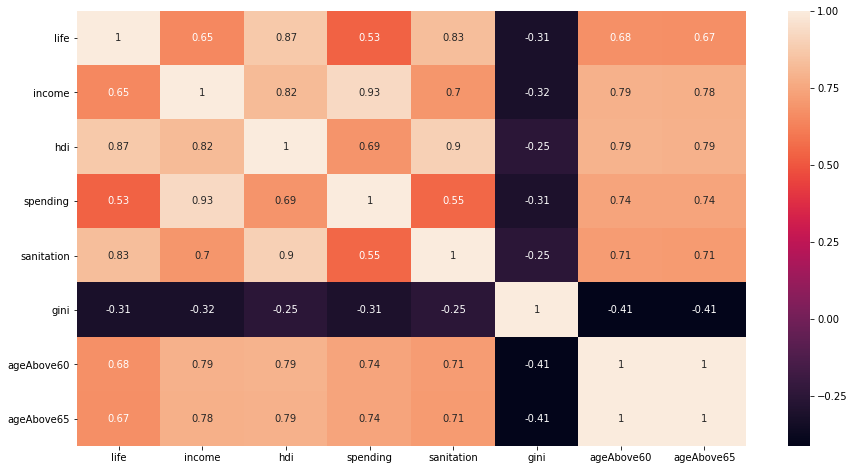

In [75]:
# calculate the correlation
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

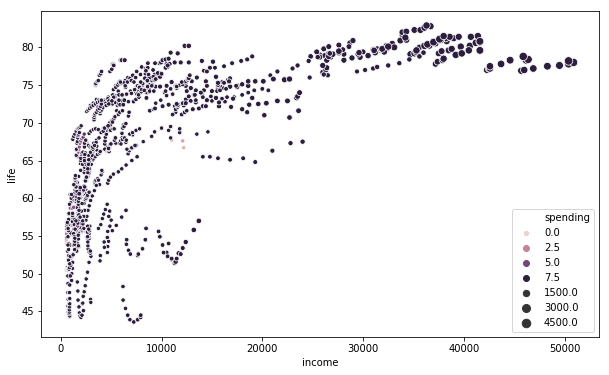

In [76]:
# some figures
plt.figure(figsize=(10,6))
sns.scatterplot(data['income'],data['life'],hue=data['spending'],size=data['spending'],hue_norm=(0,7))
plt.ioff()

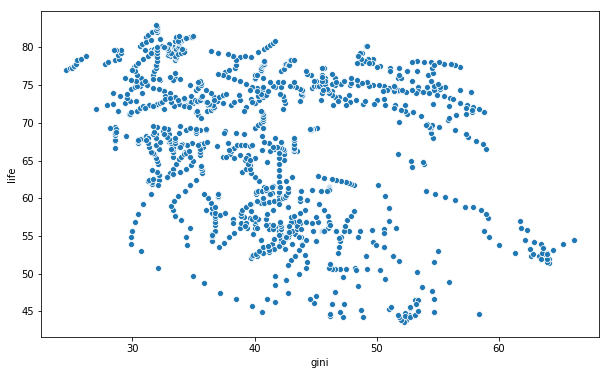

In [77]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['gini'],data['life'])
plt.ioff()

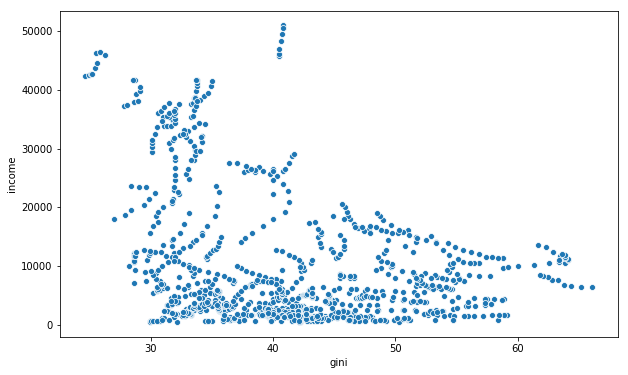

In [78]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['gini'],data['income'])
plt.ioff()

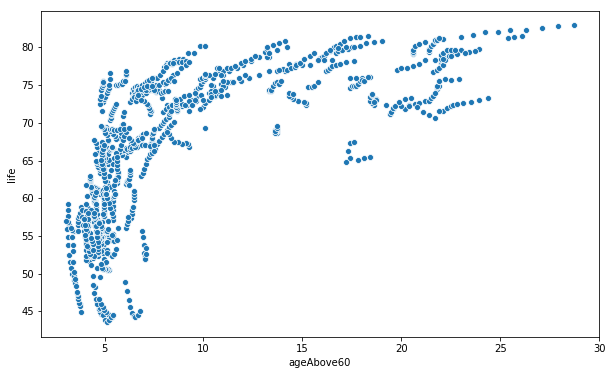

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['ageAbove60'],data['life'])
plt.ioff()


In [49]:
data[data['ageAbove60'] > 10]['country'].unique()

array(['Albania', 'Argentina', 'Armenia', 'Australia', 'Belgium',
       'Bulgaria', 'Canada', 'Chile', 'Croatia', 'Cuba', 'Cyprus',
       'Denmark', 'France', 'Georgia', 'Greece', 'Hungary', 'Israel',
       'Jamaica', 'Japan', 'Lithuania', 'Moldova', 'New Zealand',
       'Portugal', 'Russia', 'South Korea', 'Spain', 'United States',
       'Uruguay', 'China', 'Romania', 'Thailand', 'Sri Lanka',
       'Bosnia and Herzegovina', 'North Macedonia', 'Tunisia', 'Italy',
       'Antigua and Barbuda', 'Mauritius', 'Costa Rica'], dtype=object)

In [80]:
data[data['ageAbove65'] > 7]['country'].unique()

array(['Albania', 'Argentina', 'Armenia', 'Australia', 'Belgium',
       'Bulgaria', 'Canada', 'Chile', 'Croatia', 'Cuba', 'Cyprus',
       'Denmark', 'France', 'Georgia', 'Greece', 'Hungary', 'Israel',
       'Jamaica', 'Japan', 'Lithuania', 'Moldova', 'New Zealand',
       'Portugal', 'Russia', 'South Korea', 'Spain', 'United States',
       'Uruguay', 'Romania', 'China', 'Thailand', 'Tunisia',
       'Bosnia and Herzegovina', 'North Macedonia', 'Antigua and Barbuda',
       'Italy', 'Sri Lanka', 'Mauritius'], dtype=object)

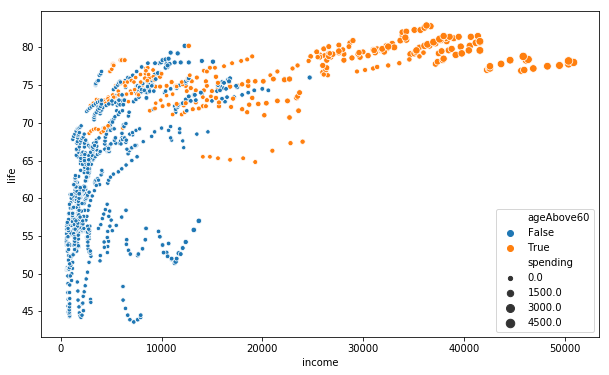

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['income'],data['life'],hue=data['ageAbove60']>10,size=data['spending'],hue_norm=(0,7))
plt.ioff()

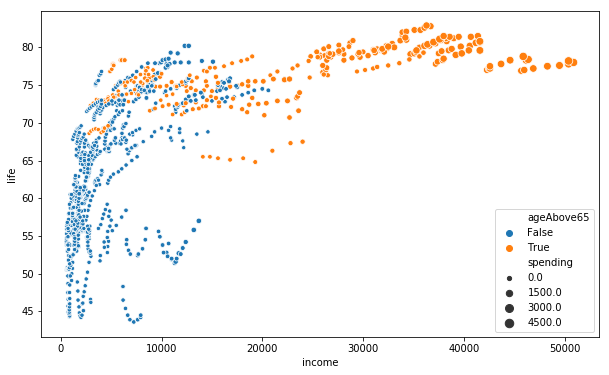

In [81]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['income'],data['life'],hue=data['ageAbove65']>7,size=data['spending'],hue_norm=(0,7))
plt.ioff()

In [45]:
# divide the data into X and Y
X = data.drop(["life","year","country"],axis=1)
Y = data["life"]
print(X.shape)
print(Y.shape)

(1038, 8)
(1038,)


In [ ]:
# divide into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

In [33]:
print("Trainning data",X_train.shape)
print("Testing data",X_test.shape)

Trainning data (830, 5)
Testing data (208, 5)


In [34]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

from sklearn.metrics import r2_score
y_pred = linear_model.predict(X_test)
r2_score(y_test,y_pred)

0.7938081439873471